**모델의 과적합을 피하기 위한 방법**에는,
- 계수 페널라이즈드 회귀 (Coefficient penalized regression) 이 있다.

**How to?**
- training set과 test set의 비율은 전체 데이터를 기준으로 7:3의 비율로 나눌 것이다.
- training 은, SK-learn의 Ridge linear regression을 사용할 것이다.
- training 후, 모델의 성능을 측정하기 위하여 RMSE를 사용할 것이다. (Root mean squared error)

### 필요한 라이브러리를 임포트한다.

In [2]:
from urllib2 import urlopen
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터를 load 한다. training set과 test set의 비율은 7:3 이다.

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = urlopen(url)
x_data = []
y_data = []
title = []
first_line = True

for line in data.readlines():
    if first_line:
        title = line.strip().split(";")
        first_line = False
    else:
        tokens = line.strip().split(";")
        # label 데이터
        y_data.append(float(tokens[-1]))
        del (tokens[-1])
        # feature vector
        x_data.append(map(float, tokens))

In [4]:
# training data : test data = 7:3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [10]:
x_train[:10]

[[7.6, 0.19, 0.41, 1.1, 0.04, 38.0, 143.0, 0.9907, 2.92, 0.42, 11.4],
 [5.0, 0.27, 0.32, 4.5, 0.032, 58.0, 178.0, 0.98956, 3.45, 0.31, 12.6],
 [7.6, 0.48, 0.31, 9.4, 0.046, 6.0, 194.0, 0.99714, 3.07, 0.61, 9.4],
 [6.2, 0.24, 0.29, 13.3, 0.039, 49.0, 130.0, 0.9952, 3.33, 0.46, 11.0],
 [6.7, 0.26, 0.49, 8.3, 0.047, 54.0, 191.0, 0.9954, 3.23, 0.4, 10.3],
 [7.3, 0.23, 0.34, 9.3, 0.052, 19.0, 86.0, 0.99574, 3.04, 0.56, 10.0],
 [6.9, 0.23, 0.32, 16.4, 0.045, 62.0, 153.0, 0.9972, 3.22, 0.42, 10.5],
 [7.9, 0.27, 0.27, 1.7, 0.034, 25.0, 122.0, 0.99088, 2.97, 0.51, 11.9],
 [7.2, 0.08, 0.49, 1.3, 0.05, 18.0, 148.0, 0.9945, 3.46, 0.44, 10.2],
 [5.9, 0.37, 0.1, 1.6, 0.057, 39.0, 128.0, 0.9924, 3.24, 0.48, 10.1]]

In [11]:
y_train[:10]

[5.0, 7.0, 5.0, 8.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0]

### (2) ridge model training을 한다.

In [6]:
alpha_list = [0.1**i for i in [0, 1, 2, 3, 4, 5, 6]]

In [7]:
# ridge regression 에서 penalty 의 scale 을 조정하는 coefficient. 
# 값이 작을수록 ordinary 선형 회귀와 동일해진다.
ridge_model_list = []

for alpha in alpha_list:
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    ridge_model_list.append(ridge_model)

### (3) lasso model training을 한다.

In [ ]:
# lasso regression 에서 penalty 의 scale 을 조정하는 coefficient. 
# 값이 작을수록 ordinary 선형 회귀와 동일해진다.
lasso_model_list = []

for alpha in alpha_list:
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(x_train, y_train)
    lasso_model_list.append(lasso_model)

### (4) ridge모델의 rmse를 구해보자

In [19]:
# 모델의 성능을 측정하기 위해서, RMSE를 사용한다.
ridge_rmse_list = []

for model in ridge_model_list:
    # RMSE를 계산한다.
    error_vector = model.predict(x_test) - y_test
    mse = sum([error**2 for error in error_vector]) / len(error_vector)
    ridge_rmse_list.append(np.sqrt(mse))

# 결과를 출력
for i in range(len(ridge_rmse_list)):
    print("alpha : ", alpha_list[i], ", rmse : ", ridge_rmse_list[i])

('alpha : ', 1.0, ', rmse : ', 0.76113290840377734)
('alpha : ', 0.1, ', rmse : ', 0.76088386774249561)
('alpha : ', 0.010000000000000002, ', rmse : ', 0.76024480161541852)
('alpha : ', 0.0010000000000000002, ', rmse : ', 0.75816221942491102)
('alpha : ', 0.00010000000000000002, ', rmse : ', 0.75735022366212668)
('alpha : ', 1.0000000000000003e-05, ', rmse : ', 0.7572956115813807)
('alpha : ', 1.0000000000000004e-06, ', rmse : ', 0.75729137405550617)


### (5) lasso모델의 rmse를 구해보자

In [21]:
lasso_rmse_list = []

for model in lasso_model_list:
    # RMSE를 계산한다.
    error_vector = model.predict(x_test) - y_test
    mse = sum([error**2 for error in error_vector]) / len(error_vector)
    lasso_rmse_list.append(np.sqrt(mse))

# 결과를 출력
for i in range(len(lasso_rmse_list)):
    print("alpha : ", alpha_list[i], ", rmse : ", lasso_rmse_list[i])

('alpha : ', 1.0, ', rmse : ', 0.86825047739154915)
('alpha : ', 0.1, ', rmse : ', 0.79674416677251558)
('alpha : ', 0.010000000000000002, ', rmse : ', 0.77252892236926074)
('alpha : ', 0.0010000000000000002, ', rmse : ', 0.76149816435972084)
('alpha : ', 0.00010000000000000002, ', rmse : ', 0.76099132433298311)
('alpha : ', 1.0000000000000003e-05, ', rmse : ', 0.75751045691247731)
('alpha : ', 1.0000000000000004e-06, ', rmse : ', 0.75730285450399437)


### (6) linear regression model training 한다.

In [22]:
# linear model training
lin_model = linear_model.LinearRegression()
lin_model.fit(x_train, y_train)

# RMSE 측정
lin_error = lin_model.predict(x_test) - y_test
mse = sum([error**2 for error in lin_error]) / len(lin_error)
rmse = np.sqrt(mse)

print ("linear regression : ", rmse)

('linear regression : ', 0.75729091957625094)


### (7) plotting을 해보자

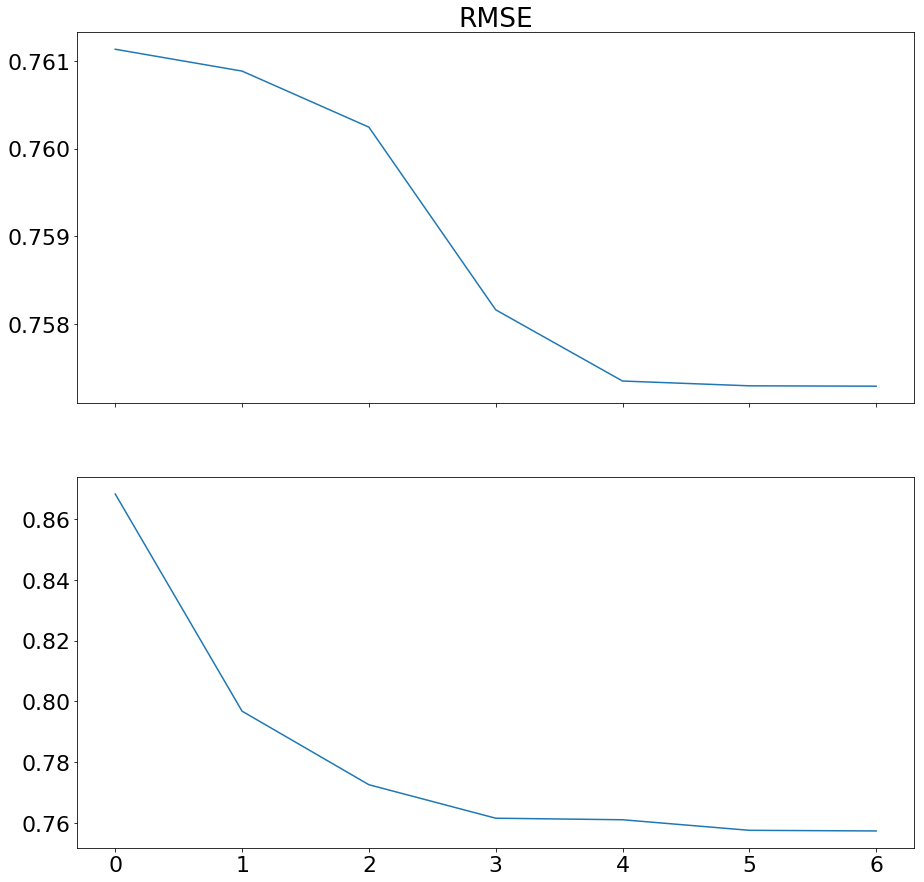

In [38]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,15)
mpl.rcParams.update({'font.size': 22})

x_axis = range(len(ridge_model_list))

f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('RMSE')

# 각각 모델을 플로팅해보자.
axarr[0].plot(x_axis, ridge_rmse_list)
axarr[1].plot(x_axis, lasso_rmse_list)